In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time

In [2]:
def coins_rec(M):
    if M == 0:
        return 0
    l = []
    for i in [1,3,5]:
        if M-i >= 0:
            l.append(coins_rec(M-i)+1)
    return min(l) 

def coins_dp(M):
    n = [0]
    for N in range(1, M+1):
        l = []
        for i in [1,3,5]:
            if N-i >= 0:
                l.append(n[N-i]+1)
        n.append(min(l))
    return n

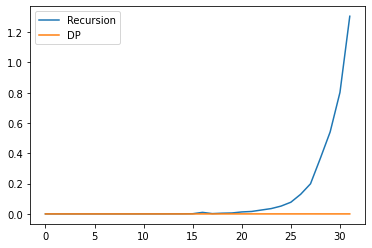

In [3]:
l_rec = []
l_dp = []
for i in range(32):
    t1 = time.time()
    coins_rec(i)
    t2 = time.time()
    coins_dp(i)
    t3 = time.time()
    l_rec.append(t2-t1)
    l_dp.append(t3-t2)

plt.plot(l_rec, label='Recursion')
plt.plot(l_dp, label='DP')
plt.legend()

In [4]:
# 同时返回结果数量与具体的结果，当有多种结果时，只返回其中一种结果
def coins_dp2(M):
    n = [0]
    nl = [[]]
    for N in range(1, M+1):
        d = {}
        for i in [1,3,5]:
            if N-i >= 0:
                d[n[N-i]+1] = i
        n.append(min(d))
        ntmp = nl[N-d[min(d)]].copy()
        ntmp.append(d[min(d)])
        nl.append(ntmp)
    return n, nl

In [5]:
n, nl = coins_dp2(16)
print(n)
print(nl)

[0, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3, 4]
[[], [1], [1, 1], [3], [1, 3], [5], [1, 5], [1, 1, 5], [3, 5], [1, 3, 5], [5, 5], [1, 5, 5], [1, 1, 5, 5], [3, 5, 5], [1, 3, 5, 5], [5, 5, 5], [1, 5, 5, 5]]
